In [1]:
%pylab inline
from biff import *
from halo import *
from octopus import profiles

Populating the interactive namespace from numpy and matplotlib


In [2]:
nmax = 10
lmax = 10
r_s = 40.85

font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def density_estim(xyz):
    """
    Rough estimate of the density!
    """
    r_halo = np.sqrt(xyz[:,0]**2.0+xyz[:,1]**2.0+xyz[:,2]**2.0)
    r = np.logspace(1E-4, 3, 50)
    rho = np.zeros(len(r))

    for i in range(len(r)-1):
        r_i = r[i]
        r_f = r[i+1]
        index = np.where((r_halo<r_f) & (r_halo>r_i))[0]
        N = len(xyz[index])
        V = 4/3.*np.pi*(r_f**3.0 - r_i**3.0)
        rho[i] = N/(V)
    return rho, r

In [4]:
NFW_halo_LR = loadtxt('NFW_halo_1E4.txt')
NFW_halo_MR = loadtxt('NFW_halo_1E5.txt')
NFW_halo_HR = loadtxt('NFW_halo_1E6.txt')

In [5]:
NFW_LR_pos = np.array([NFW_halo_LR[:,0], NFW_halo_LR[:,1], NFW_halo_LR[:,2]]).T
NFW_LR_M = NFW_halo_LR[:,3]

NFW_MR_pos = np.array([NFW_halo_MR[:,0], NFW_halo_MR[:,1], NFW_halo_MR[:,2]]).T
NFW_MR_M = NFW_halo_MR[:,3]

NFW_HR_pos = np.array([NFW_halo_HR[:,0], NFW_halo_HR[:,1], NFW_halo_HR[:,2]]).T
NFW_HR_M = NFW_halo_HR[:,3]

(-400.0, 400.0, -400.0, 400.0)

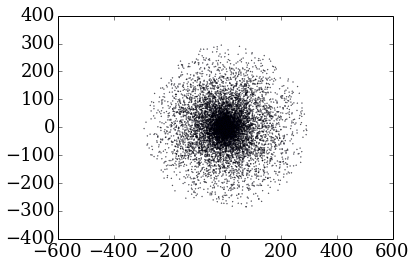

In [6]:
scatter(NFW_LR_pos[:,0], NFW_LR_pos[:,1], s=0.1)
axis('equal')

In [7]:
r_NFW = np.linspace(0, 300, 1000)
rho_teo_NFW4 = profiles.dens_NFW(40, r_NFW, 0,0, 1E4)

/usr/local/lib/python3.4/dist-packages/astropy/units/quantity.py:841: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


In [8]:
rho_est, r_est = density_estim(NFW_LR_pos)
rho_est_MR, r_est_MR = density_estim(NFW_MR_pos)
rho_est_HR, r_est_HR = density_estim(NFW_HR_pos)


(0.3003003003003003, 300)

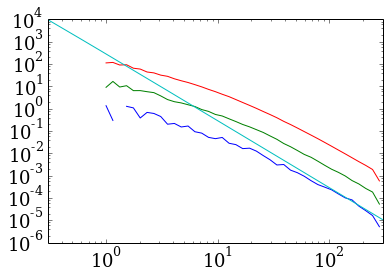

In [9]:
loglog(r_est, rho_est)
loglog(r_est_MR, rho_est_MR)
loglog(r_est_HR, rho_est_HR)

loglog(r_NFW, rho_teo_NFW4)
xlim(-20, 300)

In [35]:
S_NFWLR, T_NFWLR = biff.compute_coeffs_discrete(NFW_LR_pos.astype(np.float64), NFW_LR_M.astype(np.float64), 10, 5, 40.85)
S_NFWMR, T_NFWMR = biff.compute_coeffs_discrete(NFW_MR_pos.astype(np.float64), NFW_MR_M.astype(np.float64), 10, 5, 40.85)
S_NFWHR, T_NFWHR = biff.compute_coeffs_discrete(NFW_HR_pos.astype(np.float64), NFW_HR_M.astype(np.float64), 10, 5, 40.85)
#S_NFWLR_00, T_NFWLR_00 = biff.compute_coeffs_discrete(NFW_LR_pos.astype(np.float64), NFW_LR_M.astype(np.float64), 10, 0, 40.85)

In [36]:
S_NFWLR_00 = S_NFWLR[:,0,0]
S_NFWLR_22 = S_NFWLR[:,2,2]
S_NFWLR_54 = S_NFWLR[:,5,4]

T_NFWLR_00 = T_NFWLR[:,0,0]
T_NFWLR_22 = T_NFWLR[:,2,2]
T_NFWLR_54 = T_NFWLR[:,5,4]

S_NFWMR_00 = S_NFWMR[:,0,0]
S_NFWMR_22 = S_NFWMR[:,2,2]
S_NFWMR_54 = S_NFWMR[:,5,4]

T_NFWMR_00 = T_NFWMR[:,0,0]
T_NFWMR_22 = T_NFWMR[:,2,2]
T_NFWMR_54 = T_NFWMR[:,5,4]

S_NFWHR_00 = S_NFWHR[:,0,0]
S_NFWHR_22 = S_NFWHR[:,2,2]
S_NFWHR_54 = S_NFWHR[:,5,4]

T_NFWHR_00 = T_NFWHR[:,0,0]
T_NFWHR_22 = T_NFWHR[:,2,2]
T_NFWHR_54 = T_NFWHR[:,5,4]



In [12]:
def plot_harmonic_coeff(S, l, m):
    """
    Computes the coefficients harmonics from a 3d array with all the coefficients.
    """
    S_harmonic = S_NFWLR_00[:,l,m]
    figure(figsize=(7,5))
    plot(S_harmonic,lw=1.5, c='k', ms='o')
    xlabel('$n$', fontsize=25)
    ylabel('$S(n,{:1d},{:1d})$'.format(l,m), fontsize=25)
    

In [13]:
#plot_harmonic_coeff(S_NFWLR_00, 0, 0)
#plot_harmonic_coeff(S_NFWLR_00, 5, 2)

In [14]:
def cleaning_ml(S, T):
    """
    Function that remove the terms with m>l by selecting the coefficients
    that are zero.
    """
    index = np.where(S!=0)[0]
    S_clean = S[index]
    T_clean = T[index]
    return S_clean, T_clean

In [37]:
S_NFWLR_cl, T_NFWLR_cl = cleaning_ml(S_NFWLR.flatten(), T_NFWLR.flatten())
S_NFWMR_cl, T_NFWMR_cl = cleaning_ml(S_NFWMR.flatten(), T_NFWMR.flatten())
S_NFWHR_cl, T_NFWHR_cl = cleaning_ml(S_NFWHR.flatten(), T_NFWHR.flatten())



In [16]:
#S_NFWLR_smooth, T_NFWLR_smooth = smooth_coefficients('cov_mat_NFW1E4.txt', 5, 5, S_NFWLR_cl, T_NFWLR_cl)


In [40]:
S_NFWLR00_smooth, T_NFWLR00_smooth = smooth_coefficients('cov_mat_harmonic00_NFW1e4.txt',10, 0, S_NFWLR_00, T_NFWLR_00)
S_NFWLR22_smooth, T_NFWLR22_smooth = smooth_coefficients('cov_mat_harmonic22_NFW1e4.txt',10, 0, S_NFWLR_22, T_NFWLR_22)
S_NFWLR54_smooth, T_NFWLR54_smooth = smooth_coefficients('cov_mat_harmonic54_NFW1e4.txt',10, 0, S_NFWLR_54, T_NFWLR_54)

S_NFWMR00_smooth, T_NFWMR00_smooth = smooth_coefficients('cov_mat_harmonic00_NFW1e5.txt',10, 0, S_NFWMR_00, T_NFWMR_00)

S_NFWHR00_smooth, T_NFWHR00_smooth = smooth_coefficients('cov_mat_harmonic00_NFW1e6.txt',10, 0, S_NFWHR_00, T_NFWHR_00)



In [42]:
# Computing b_smooth

# LR
cov_mat_hNFWLR00 = loadtxt('cov_mat_harmonic00_NFW1e4.txt')
cov_mat_NFWLR00 = read_cov_mat(cov_mat_hNFWLR00[:,0], 10, 0)
b_NFWLR_00 = b(S_NFWLR_00, diagonal(cov_mat_NFWLR00))


cov_mat_hNFWLR22 = loadtxt('cov_mat_harmonic22_NFW1e4.txt')
cov_mat_NFWLR22 = read_cov_mat(cov_mat_hNFWLR22[:,0], 10, 0)
b_NFWLR_22 = b(S_NFWLR_22, diagonal(cov_mat_NFWLR22))

cov_mat_hNFWLR54 = loadtxt('cov_mat_harmonic54_NFW1e4.txt')
cov_mat_NFWLR54 = read_cov_mat(cov_mat_hNFWLR54[:,0], 10, 0)
b_NFWLR_54 = b(S_NFWLR_54, diagonal(cov_mat_NFWLR54))

# MR

cov_mat_hNFWMR00 = loadtxt('cov_mat_harmonic00_NFW1e5.txt')
cov_mat_NFWMR00 = read_cov_mat(cov_mat_hNFWMR00[:,0], 10, 0)
b_NFWMR_00 = b(S_NFWMR_00, diagonal(cov_mat_NFWMR00))

# HR

cov_mat_hNFWHR00 = loadtxt('cov_mat_harmonic00_NFW1e6.txt')
cov_mat_NFWHR00 = read_cov_mat(cov_mat_hNFWHR00[:,0], 10, 0)
b_NFWHR_00 = b(S_NFWHR_00, diagonal(cov_mat_NFWHR00))

# signal2noise

SN_NFWLR00 = signal2noise(S_NFWLR_00, diagonal(cov_mat_NFWLR00))
SN_NFWLR22 = signal2noise(S_NFWLR_22, diagonal(cov_mat_NFWLR22))
SN_NFWLR54 = signal2noise(S_NFWLR_54, diagonal(cov_mat_NFWLR54))

SN_NFWMR00 = signal2noise(S_NFWMR_00, diagonal(cov_mat_NFWMR00))

SN_NFWHR00 = signal2noise(S_NFWHR_00, diagonal(cov_mat_NFWHR00))



# PCA


S_NFWLR00_pca_smooth, b_S, T_NFWLR00_pca_smooth, b_T = PCA_coefficients(S_NFWLR_00, T_NFWLR_00,'cov_mat_harmonic00_NFW1e4.txt', 10, 0)
S_NFWLR22_pca_smooth, b_S, T_NFWLR22_pca_smooth, b_T = PCA_coefficients(S_NFWLR_22, T_NFWLR_22,'cov_mat_harmonic22_NFW1e4.txt', 10, 0)
S_NFWLR54_pca_smooth, b_S, T_NFWLR54_pca_smooth, b_T = PCA_coefficients(S_NFWLR_54, T_NFWLR_54,'cov_mat_harmonic54_NFW1e4.txt', 10, 0)


S_NFWMR00_pca_smooth, b_S, T_NFWMR00_pca_smooth, b_T = PCA_coefficients(S_NFWMR_00, T_NFWMR_00,'cov_mat_harmonic00_NFW1e5.txt', 10, 0)

S_NFWHR00_pca_smooth, b_S, T_NFWHR00_pca_smooth, b_T = PCA_coefficients(S_NFWHR_00, T_NFWHR_00,'cov_mat_harmonic00_NFW1e6.txt', 10, 0)

# F_k

out_S00_LR, l_s00_LR, evec_S00_LR = outter_matrix(S_NFWLR_00)
out_S22_LR, l_s22_LR, evec_S22_LR = outter_matrix(S_NFWLR_22)
out_S54_LR, l_s54_LR, evec_S54_LR = outter_matrix(S_NFWLR_54)

out_S00_MR, l_s00_MR, evec_S00_MR = outter_matrix(S_NFWMR_00)

out_S00_HR, l_s00_HR, evec_S00_HR = outter_matrix(S_NFWHR_00)


F_k_00_LR = F_k(l_s00_LR)
F_k_22_LR = F_k(l_s22_LR)
F_k_54_LR = F_k(l_s54_LR)

F_k_00_MR = F_k(l_s00_MR)

F_k_00_HR = F_k(l_s00_HR)


/usr/local/lib/python3.4/dist-packages/Halo_tools-0.1-py3.4.egg/halo/SCF_analysis.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


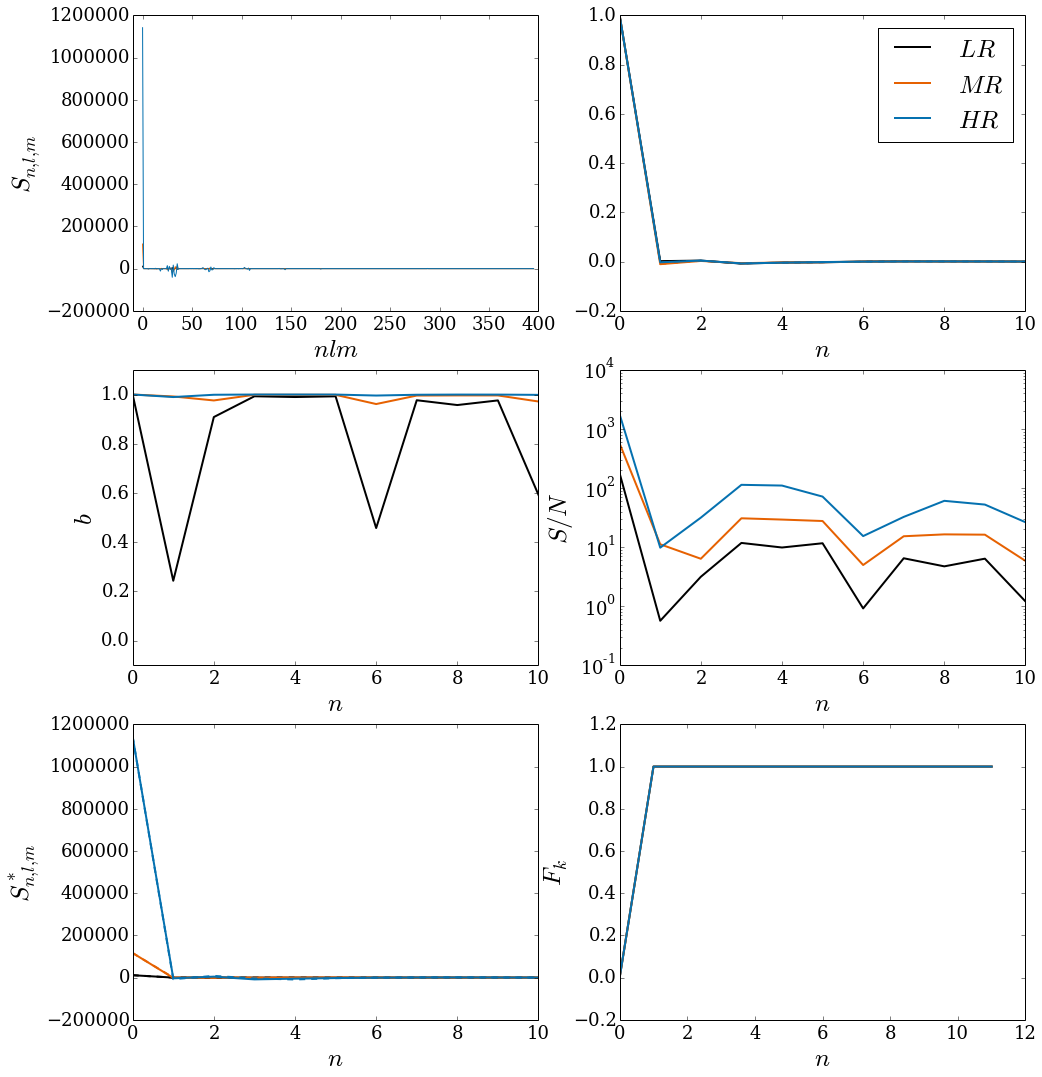

In [59]:
Smax = np.max(np.abs(S_NFWLR))
Smax_MR = np.max(np.abs(S_NFWMR))
Smax_HR = np.max(np.abs(S_NFWHR))


#colors=['#377eb8', '#e41a1c','#4daf4a']
colors=['k', '#e66101','#0571b0']

figure(figsize=(16,18))
subplot(3, 2, 1)
plot(S_NFWLR.flatten(), c=colors[0], lw=1)
plot(S_NFWMR.flatten(), c=colors[1], lw=1)
plot(S_NFWHR.flatten(), c=colors[2], lw=1)
ylabel('$S_{n,l,m}$', fontsize=25)
xlabel('$nlm$', fontsize=25)
#ylim(-1.1, 1.1)
xlim(-10, 400)

subplot(3, 2, 2)
plot(S_NFWLR_00/Smax, lw=2.0, c=colors[0], label='$LR$')
plot(S_NFWLR00_smooth/Smax, lw=1.5, c=colors[0], ls='--')

plot(S_NFWMR_00/Smax_MR, lw=2.0, c=colors[1], label='$MR$')
plot(S_NFWMR00_smooth/Smax_MR, lw=1.5, c=colors[1], ls='--')

plot(S_NFWHR_00/Smax_HR, lw=2.0, c=colors[2], label='$HR$')
plot(S_NFWHR00_smooth/Smax_HR, lw=1.5, c=colors[2], ls='--')

#plot(S_NFWLR_22/Smax, lw=2.0, c=colors[1], label='$l=2,\ m=2$')
#plot(S_NFWLR22_smooth/Smax, lw=1.5, c=colors[1], ls='--')

#plot(S_NFWLR_54/Smax, lw=2.0, c=colors[2], label='$l=5,\ m=4$')
#plot(S_NFWLR54_smooth/Smax, lw=1.5, c=colors[2], ls='--')
#ylabel('$S_{n,l,m}$', fontsize=25
legend(loc='best', fontsize=25)
xlabel('$n$', fontsize=25)


subplot(3, 2, 3)
plot(b_NFWLR_00, lw=2, c=colors[0])
plot(b_NFWMR_00, lw=2, c=colors[1])
plot(b_NFWHR_00, lw=2, c=colors[2])

#plot(b_NFWLR_22, lw=2, c=colors[1])
#plot(b_NFWLR_54, lw=2, c=colors[2])
ylim(-0.1, 1.1)
ylabel('$b$', fontsize=25)
xlabel('$n$', fontsize=25)

subplot(3, 2, 4)
semilogy(SN_NFWLR00, c=colors[0], lw=2)
semilogy(SN_NFWMR00, c=colors[1], lw=2)
semilogy(SN_NFWHR00, c=colors[2], lw=2)

#semilogy(SN_NFWLR22, c=colors[1], lw=2)
#semilogy(SN_NFWLR54, c=colors[2], lw=2)

ylabel('$S/N$', fontsize=25)
xlabel('$n$', fontsize=25)
#ylim(-5, 190)

subplot(3, 2, 5)
plot(S_NFWLR_00, c=colors[0], lw=2)
plot(S_NFWLR00_pca_smooth, c=colors[0], ls='--', lw=2)

plot(S_NFWMR_00, c=colors[1], lw=2)
plot(S_NFWMR00_pca_smooth, c=colors[1], ls='--', lw=2)

plot(S_NFWHR_00, c=colors[2], lw=2)
plot(S_NFWHR00_pca_smooth, c=colors[2], ls='--', lw=2)

#plot(S_NFWLR_22/Smax, c=colors[1], lw=2)
#plot(S_NFWLR22_pca_smooth/Smax, c=colors[1], ls='--', lw=2)
#plot(S_NFWLR_54/Smax, c=colors[2], lw=2)
#plot(S_NFWLR54_pca_smooth/Smax, c=colors[2], ls='--', lw=2)
ylabel('$S^{*}_{n,l,m}$', fontsize=25)
xlabel('$n$', fontsize=25)


subplot(3, 2, 6)
plot(F_k_00_LR, c=colors[0], lw=2)
plot(F_k_00_MR, c=colors[1], lw=2)
plot(F_k_00_HR, c=colors[2], lw=2)

#plot(F_k_22, c=colors[1], lw=2)
#plot(F_k_54, c=colors[2], lw=2)
xlabel('$n$', fontsize=25)
ylabel('$F_k$', fontsize=25)

ylim(-0.2, 1.2)

savefig('NFW_SCF_analysis.png', bbox_inches='tight')



In [20]:
def biff_density(pos, S, T, M, r_s):
    rho_SCF = biff.density(np.ascontiguousarray(pos.astype(np.float64)), np.ascontiguousarray(S), np.ascontiguousarray(T), M=M, r_s=r_s)
    r_halo = np.sqrt(pos[:,0]**2.0 + pos[:,1]**2.0 + pos[:,2]**2.0)
    index_sort = argsort(r_halo)
    return r_halo[index_sort],rho_SCF[index_sort]
    #loglog(r_halo[index_sort],rho_SCF[index_sort], lw=2)
    #semilogy(r_NFW, rho_teo_NFW4)
    #xlim(-20, 300)
    #ylim(-1E-4, 1E6)
    

    

In [21]:
r_NFW00, rho_NFW00 = biff_density(NFW_LR_pos, S_NFWLR_00.reshape(11,1,1), T_NFWLR_00.reshape(11,1,1), sum(NFW_LR_M), r_s)
r_NFW00_PCA_smooth, rho_NFW00_PCA_smooth = biff_density(NFW_LR_pos, S_NFWLR00_pca_smooth.reshape(11,1,1), T_NFWLR00_pca_smooth.reshape(11,1,1), sum(NFW_LR_M), r_s)








(1, 300)

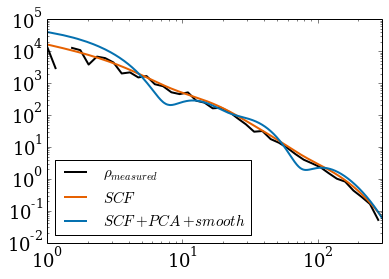

In [22]:
loglog(r_est, rho_est*1E4, c='k', alpha=1.0, lw=2.0, label=r'$\rho_{measured}$')
loglog(r_NFW00, rho_NFW00, c=colors[1], lw=2.0, label='$SCF$')
loglog(r_NFW00_PCA_smooth, rho_NFW00_PCA_smooth, c=colors[2], lw=2.0, label='$SCF+PCA+smooth$')
legend(loc='best', fontsize=15)
xlim(1, 300)

In [210]:
S_NFWLR_smooth_mat = relevant_coefficients(S_NFWLR_smooth, 0, 5, 5)
T_NFWLR_smooth_mat = relevant_coefficients(T_NFWLR_smooth, 0, 5, 5)
biff_density(NFW_LR_pos, S_NFWLR_smooth_mat, T_NFWLR_smooth_mat, sum(NFW_LR_M), r_s)
semilogy(r_est, rho_est*1E4)


NameError: name 'S_NFWLR_smooth' is not defined